In [1]:
from tqdm import tqdm
from collections import Counter

players = Counter()

max_lines = 10000000

with open('lichess_db_standard_rated_2022-07.pgn/lichess_db_standard_rated_2022-07.pgn') as f:
    for i, line in enumerate(tqdm(f)):
        max_lines -= 1
        if '[White ' in line or '[Black ' in line:
            players[line[8:-3]] += 1
        if not max_lines:
            break

len(players)

9999999it [00:12, 800829.32it/s]


197932

In [3]:
active_players = [player for player in players if players[player] > 10]
len(active_players)

22413

In [4]:
huge_sample = active_players

In [5]:
import requests
from dataclasses import dataclass
from typing import Optional

@dataclass
class Player:
    name: str
    bullet_rating: Optional[int]
    bullet_games: Optional[int]
    blitz_rating: Optional[int]
    blitz_games: Optional[int]
    rapid_rating: Optional[int]
    rapid_games: Optional[int]
    classical_rating: Optional[int]
    classical_games: Optional[int]
    puzzle_rating: Optional[int]
    puzzle_games: Optional[int]
    

huge_players = []
    
s = requests.Session()

for i, name in enumerate(tqdm(huge_sample)):
    url = f'https://lichess.org/api/user/{name}'
    r = s.get(url)
    try:
        player = Player(r.json()['username'],
                        r.json()['perfs']['bullet']['rating'],
                        r.json()['perfs']['bullet']['games'],
                        r.json()['perfs']['blitz']['rating'],
                        r.json()['perfs']['blitz']['games'],
                        r.json()['perfs']['rapid']['rating'],
                        r.json()['perfs']['rapid']['games'],
                        r.json()['perfs']['classical']['rating'],
                        r.json()['perfs']['classical']['games'],
                        r.json()['perfs']['puzzle']['rating'],
                        r.json()['perfs']['puzzle']['games'])
        huge_players.append(player)
    except KeyError:
        pass

len(huge_players)

100%|██████████████████████████████████████████████████████████████████████████| 22413/22413 [2:20:12<00:00,  2.66it/s]


18505

In [14]:
# TODO: dump to csv
import pandas as pd
from dataclasses import asdict

df = pd.DataFrame.from_records([asdict(player) for player in huge_players])
df.to_csv('players.csv')

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

players_final = [p for p in huge_players if 
                 p.bullet_rating != 1500 and p.bullet_rating >= 1000 
                 and p.blitz_rating != 1500 and p.blitz_rating >= 1000
                 and p.rapid_rating != 1500 and p.rapid_rating >= 1000
                 and p.classical_rating != 1500 and p.classical_rating >= 1000]

bullet_ratings = [player.bullet_rating for player in players_final]
blitz_ratings = [player.blitz_rating for player in players_final]
rapid_ratings = [player.rapid_rating for player in players_final]
classical_ratings = [player.classical_rating for player in players_final]
puzzle_ratings = [player.puzzle_rating for player in players_final]

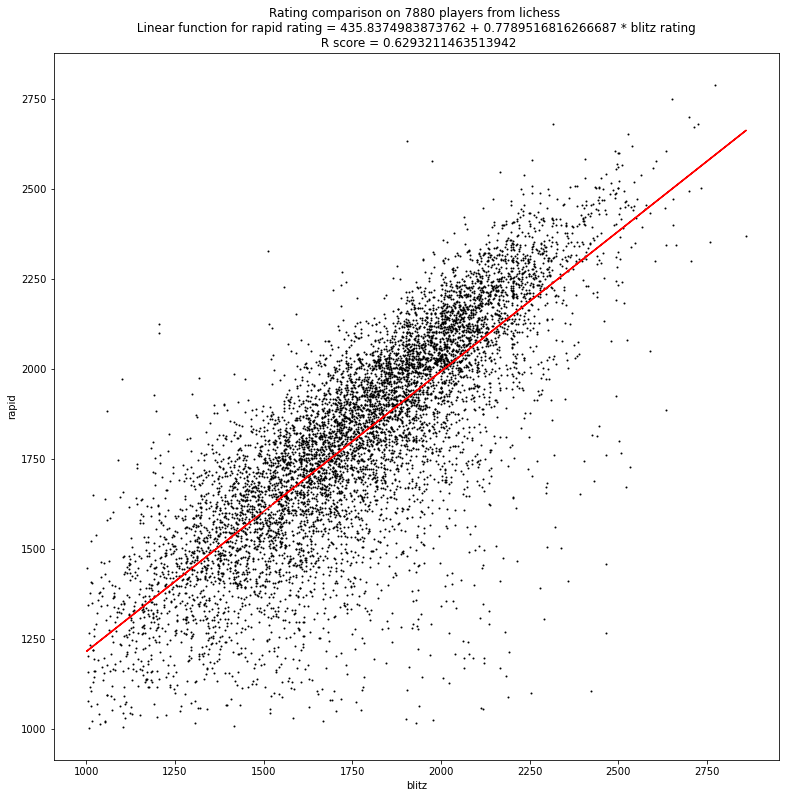

In [17]:
X = np.array(blitz_ratings).reshape(-1, 1)
y = np.array(rapid_ratings)

lr = LinearRegression()
lr.fit(X, y)

rapid_predicted = lr.predict(X)

fig, ax = plt.subplots(figsize=(13, 13))

plt.scatter(blitz_ratings, rapid_ratings, c='black', s=1)
plt.plot(blitz_ratings, rapid_predicted, c='red')

ax.set_xlabel('blitz')
ax.set_ylabel('rapid')
ax.set_title(f'Rating comparison on {len(players_final)} players from lichess \n Linear function for rapid rating = {lr.intercept_} + {lr.coef_[0]} * blitz rating \n R score = {lr.score(X, y)}')

plt.savefig('ratings.jpg')
plt.show()

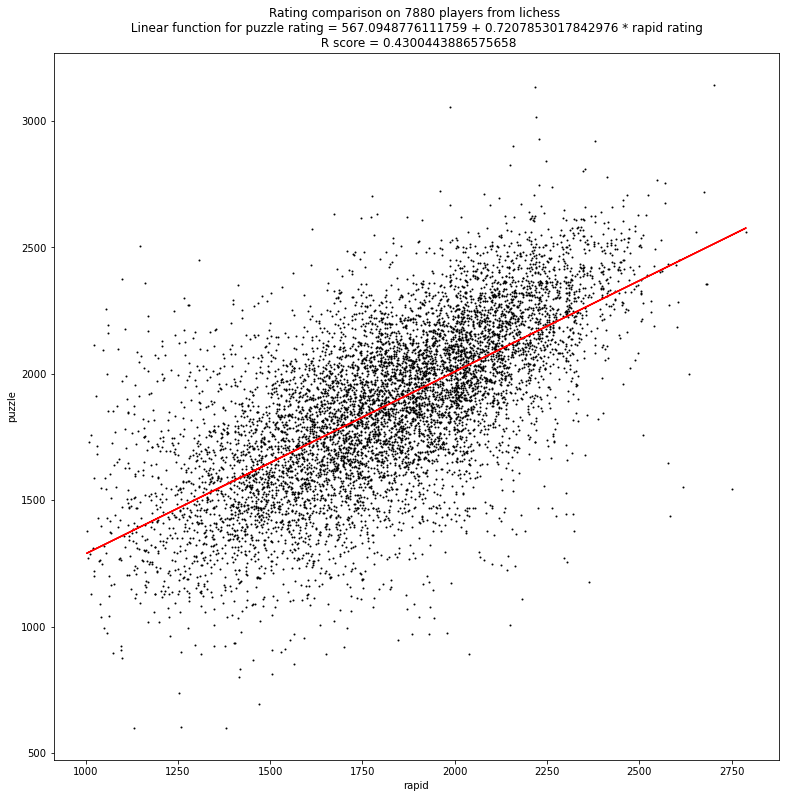

In [18]:
X = np.array(rapid_ratings).reshape(-1, 1)
y = np.array(puzzle_ratings)

lr = LinearRegression()
lr.fit(X, y)

puzzle_predicted = lr.predict(X)

fig, ax = plt.subplots(figsize=(13, 13))

plt.scatter(rapid_ratings, puzzle_ratings, c='black', s=1)
plt.plot(rapid_ratings, puzzle_predicted, c='red')

ax.set_xlabel('rapid')
ax.set_ylabel('puzzle')
ax.set_title(f'Rating comparison on {len(players_final)} players from lichess \n Linear function for puzzle rating = {lr.intercept_} + {lr.coef_[0]} * rapid rating \n R score = {lr.score(X, y)}')

plt.show()

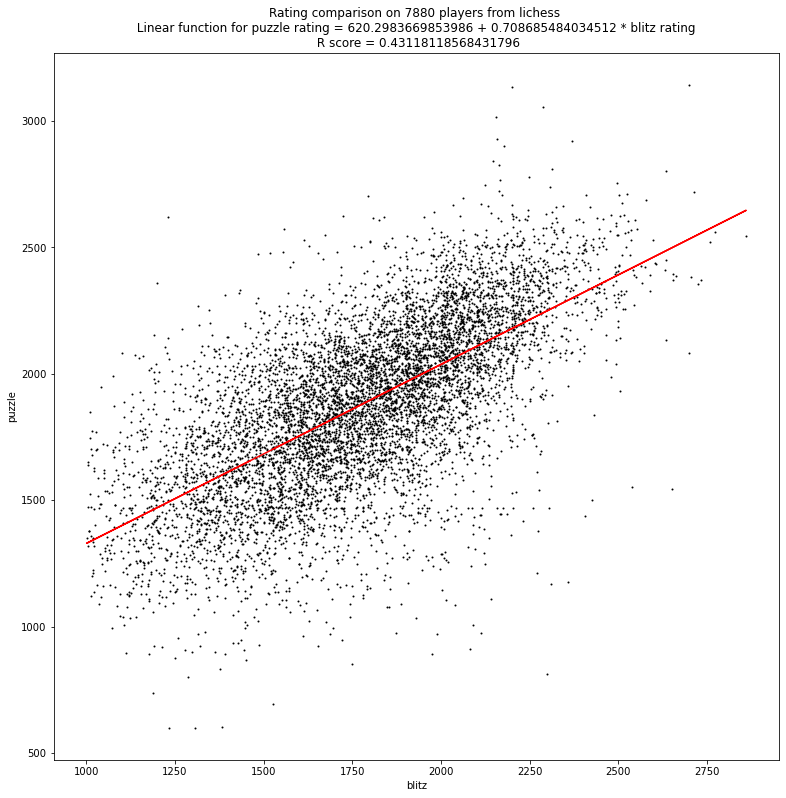

In [19]:
X = np.array(blitz_ratings).reshape(-1, 1)
y = np.array(puzzle_ratings)

lr = LinearRegression()
lr.fit(X, y)

puzzle_predicted = lr.predict(X)

fig, ax = plt.subplots(figsize=(13, 13))

plt.scatter(blitz_ratings, puzzle_ratings, c='black', s=1)
plt.plot(blitz_ratings, puzzle_predicted, c='red')

ax.set_xlabel('blitz')
ax.set_ylabel('puzzle')
ax.set_title(f'Rating comparison on {len(players_final)} players from lichess \n Linear function for puzzle rating = {lr.intercept_} + {lr.coef_[0]} * blitz rating \n R score = {lr.score(X, y)}')

plt.show()

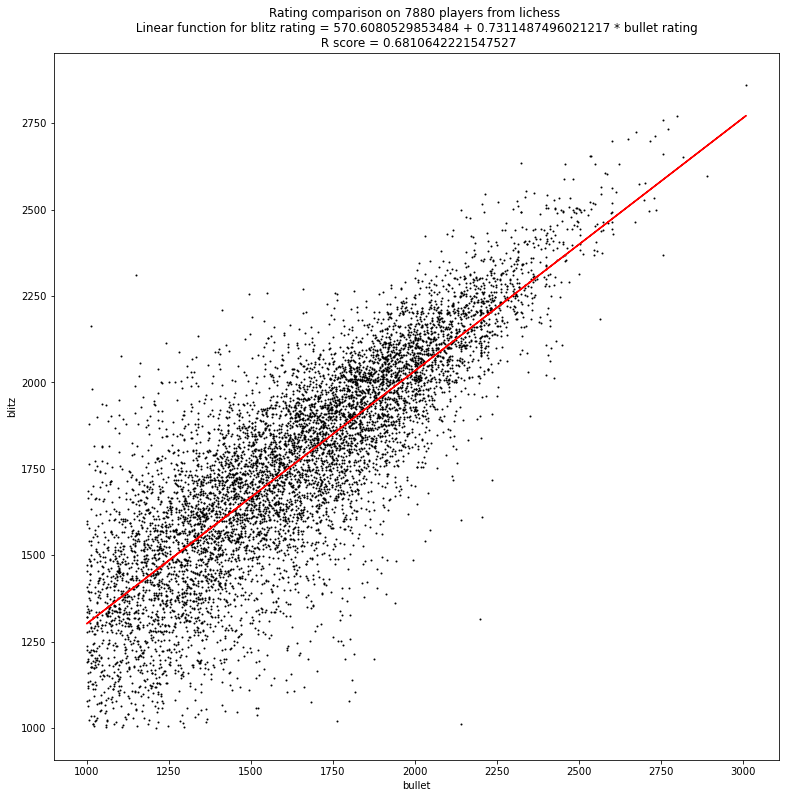

In [22]:
X = np.array(bullet_ratings).reshape(-1, 1)
y = np.array(blitz_ratings)

lr = LinearRegression()
lr.fit(X, y)

blitz_predicted = lr.predict(X)

fig, ax = plt.subplots(figsize=(13, 13))

plt.scatter(bullet_ratings, blitz_ratings, c='black', s=1)
plt.plot(bullet_ratings, blitz_predicted, c='red')

ax.set_xlabel('bullet')
ax.set_ylabel('blitz')
ax.set_title(f'Rating comparison on {len(players_final)} players from lichess \n Linear function for blitz rating = {lr.intercept_} + {lr.coef_[0]} * bullet rating \n R score = {lr.score(X, y)}')

plt.savefig('bullet-blitz-ratings.jpg')
plt.show()

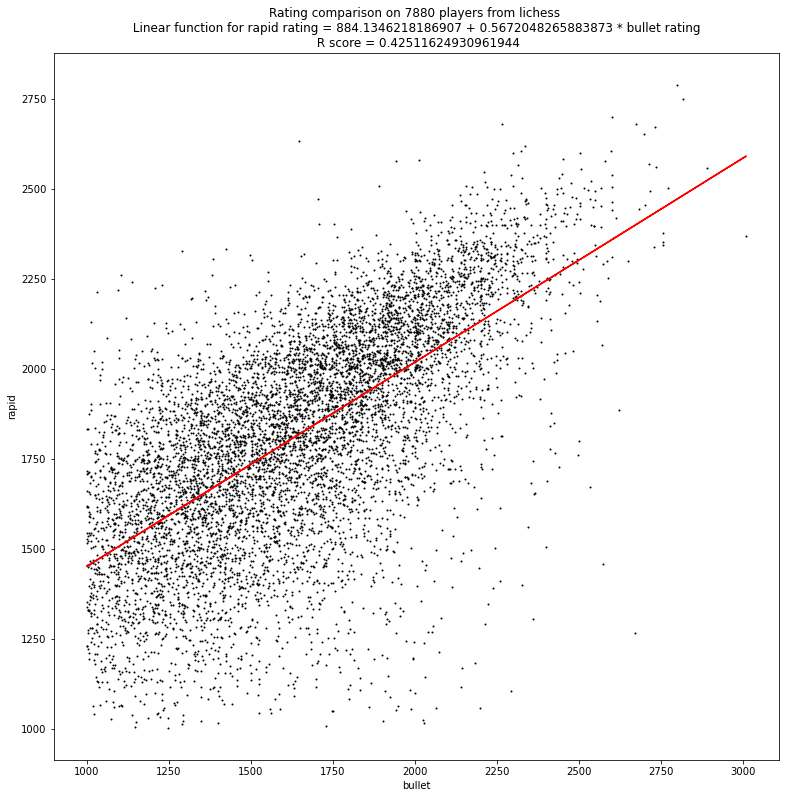

In [23]:
X = np.array(bullet_ratings).reshape(-1, 1)
y = np.array(rapid_ratings)

lr = LinearRegression()
lr.fit(X, y)

rapid_predicted = lr.predict(X)

fig, ax = plt.subplots(figsize=(13, 13))

plt.scatter(bullet_ratings, rapid_ratings, c='black', s=1)
plt.plot(bullet_ratings, rapid_predicted, c='red')

ax.set_xlabel('bullet')
ax.set_ylabel('rapid')
ax.set_title(f'Rating comparison on {len(players_final)} players from lichess \n Linear function for rapid rating = {lr.intercept_} + {lr.coef_[0]} * bullet rating \n R score = {lr.score(X, y)}')

plt.savefig('bullet-rapid-ratings.jpg')
plt.show()